<a href="https://colab.research.google.com/github/SharatKhote/Exploratory-Data-Analysis/blob/main/Project_(Hotel_Bookins).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.

**We will try to answer the following Questions**
<ol>
<li> What type of hotel does a customer book in general?</li>
<li> Which year most of customers arrive?</li>
<li> Which are the busiest months in the year of hotel booking?</li>
<li> How many booking were cancelled.</li>
<li> From which country most guests arrive.</li>
<li> How customers booked their hotel from market segment.</li>
<li> How many customers were stays in week nights and booking changes?</li>
<li> How many repeated customers?</li>
<li> Deposit type payment of customer?</li>
<li> Correlation of Data Set</li>
</ol>

In [24]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Reading CSV file and converting it into DataFrame

hotel_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

**Exploration Of Data**

In [27]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [29]:
# Checking for NULL values in DataFrame in Sorted form

hotel_data.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [30]:
hotel_data[['agent','company']] = hotel_data[['agent','company']].fillna(0.0)

In [31]:
# For the missing values in the country column, replace it with mode (value that appears most often)

hotel_data['country'].fillna(hotel_data.country.mode().to_string(), inplace=True)

In [32]:
# for missing children value, replace it with rounded mean value

hotel_data['children'].fillna(round(hotel_data.children.mean()), inplace=True)

In [33]:
# convert datatype of these columns from float to integer

hotel_data[['children', 'company', 'agent']] = hotel_data[['children', 'company', 'agent']].astype('int64')

In [34]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Exploratory Data Analysis**

Now, extracting the information from our data and try to answer our questions.

**1.Which type of hotel does a customer book in general?**

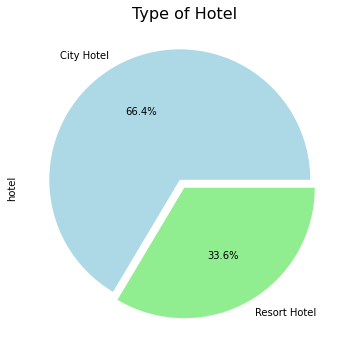

In [35]:
plt.figure(figsize = (6,6))
explode =[0.07,0]
colors = ['lightblue','lightgreen']
gen = hotel_data['hotel'].value_counts().plot(kind = 'pie',autopct = '%.1f%%', explode = explode , colors = colors)
plt.title('Type of Hotel', fontsize = 16)
plt.show()

**2.Which year most of customer arrive?**

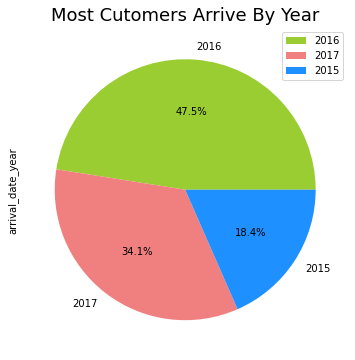

In [36]:
plt.figure(figsize = (6,6))
plt.title('''Most Cutomers Arrive By Year''', fontsize = 18)
colors = ['yellowgreen','lightcoral','dodgerblue']
hotel_data['arrival_date_year'].value_counts().plot(kind = 'pie', autopct = '%.1f%%',colors = colors)
plt.legend()


**4.How many bookings were cancelled?**

In [37]:
hotel_data['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

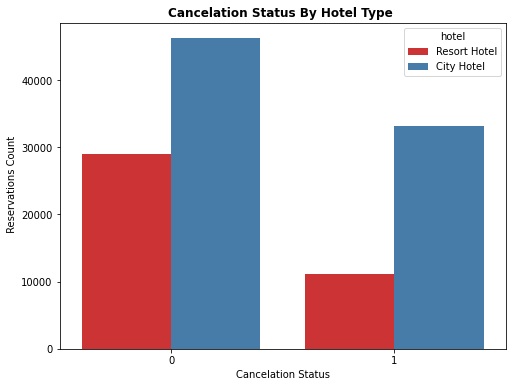

In [38]:
plt.figure(figsize = (8,6))
sns.countplot(x='is_canceled', data = hotel_data, hue = 'hotel', palette= 'Set1')

plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

**5.From which country most guest arrive?**

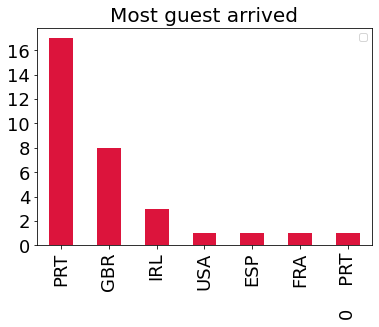

In [39]:
pts = hotel_data['country'].head(32)
plt.title('Most guest arrived', fontsize = 20)
plt.legend()
gen = pts.value_counts().plot(kind = 'bar', color = 'crimson', fontsize = 18)

**6.How customer booked their hotel from market segment?**

Text(0, 0.5, 'Booking Count')

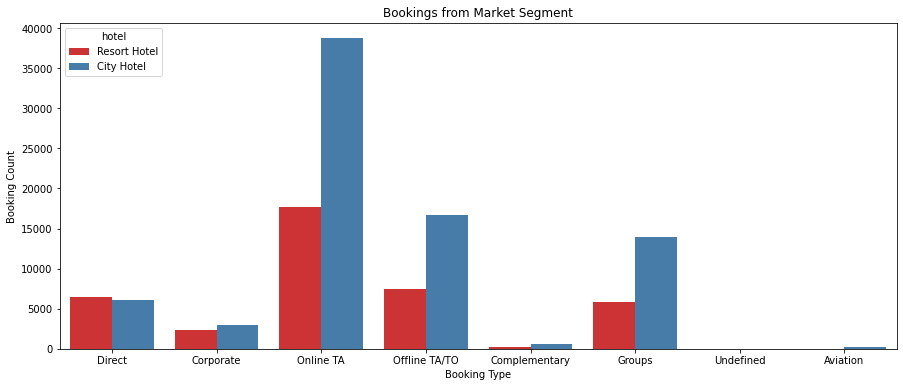

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(data = hotel_data, x= 'market_segment', hue = 'hotel', palette= 'Set1')

plt.title ('Bookings from Market Segment')
plt.xlabel("Booking Type")
plt.ylabel('Booking Count')

**7. How many customers were stays in week nights and booking changes?**

Text(0, 0.5, 'Booking Count')

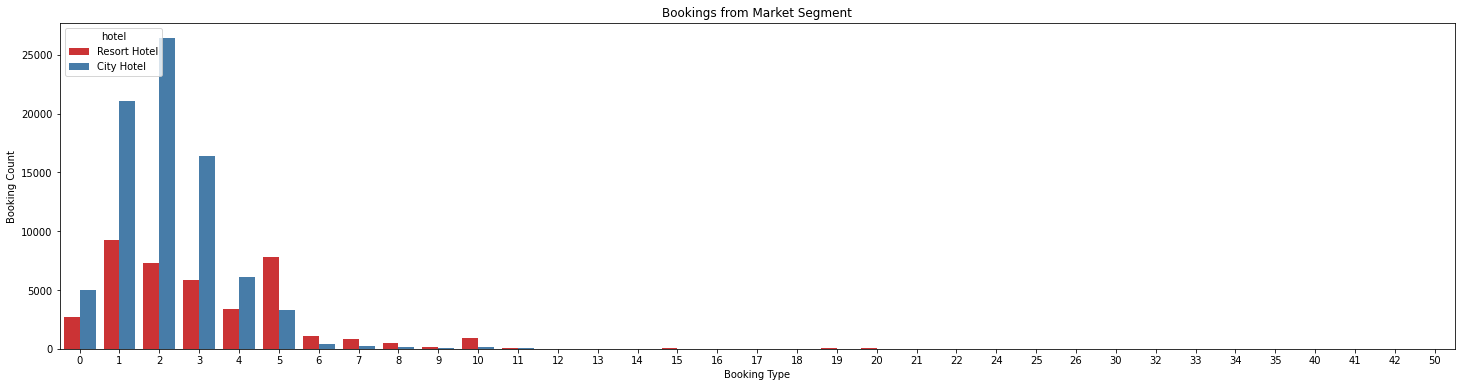

In [41]:
sorted_values=hotel_data.sort_values(by= ['stays_in_week_nights','booking_changes'])
plt.figure(figsize=(25,6))
sns.countplot(data = sorted_values, x= 'stays_in_week_nights', hue = 'hotel', palette= 'Set1')

plt.title ('Bookings from Market Segment')
plt.xlabel("Booking Type")
plt.ylabel('Booking Count')

# 8. How many repeated customers?

Text(0.5, 1.0, 'Repeated Customes')

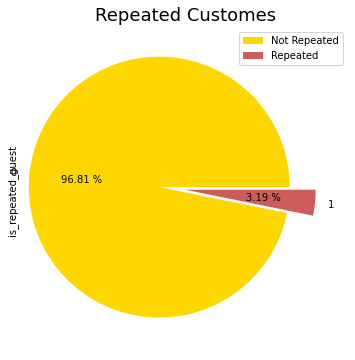

In [49]:
r = ["Not Repeated","Repeated"]
explode = [0.2,0]
plt.figure(figsize=(6,6))
colors = ['gold','indianred']
re=hotel_data['is_repeated_guest'].value_counts().plot(kind='pie', autopct = '%.2f %%',explode = explode, colors = colors)
plt.legend(r)
plt.title("Repeated Customes", fontsize = 18)

# 9. Deposite type payment of customer?

In [43]:
deposite_list=list(hotel_data['deposit_type'].unique())

Text(0.5, 1.0, "Customer's Payment-type")

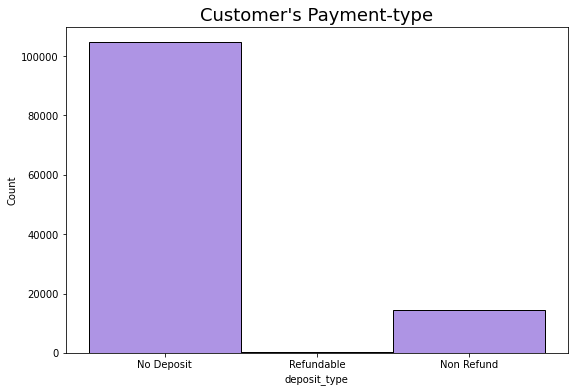

In [44]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.histplot(hotel_data['deposit_type'],ax=ax , color = 'mediumpurple')
plt.title("Customer's Payment-type", size = 18)

# 10. Correlation of dataset?

Text(0.5, 1.0, 'Co-relation of columns')

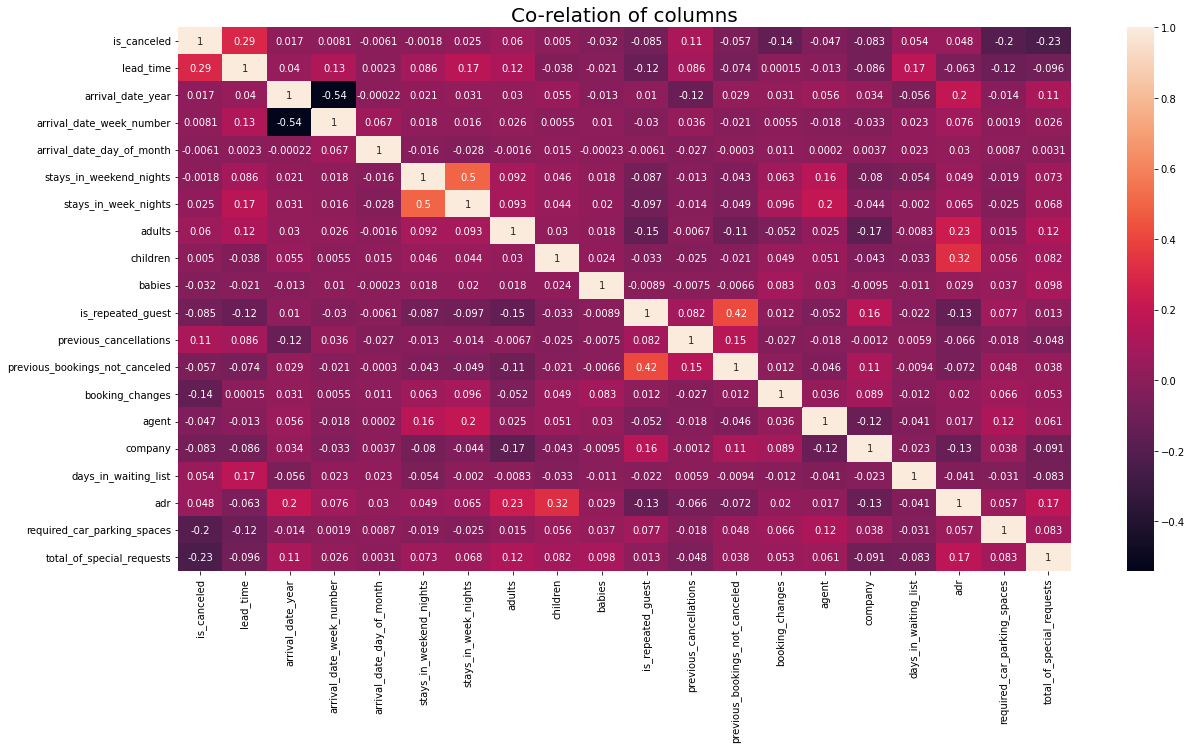

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(hotel_data.corr(),annot=True)
plt.title('Co-relation of columns', fontsize =20)